# <center> Python Project </center>

## <center> Creating graphs through covid-19 dataset </center>

### Authors: 
#### Martina Pacifici () and Federica Sauro Graziano (6360850)

In [2]:
import json
with open("C:\\Users\\feder\\OneDrive\\Documenti\\Fede\\University\\STAT_M1\\AlgoritmiPython\\project\\dpc-covid19-ita-province.json") as f:

         d = json.load(f) 

In [3]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit
import random
import math

In [4]:
corona = pd.DataFrame(d)
corona = corona.drop(corona[corona.lat==0.0].index)
corona.reset_index(inplace=True)
df = corona[0:107]

# <center> Graph bulding </center>

After having converted our dataset in a pandas DataFrame, we extract only all the 107 provinces at a particular moment of time (we didn't care about the date). In this way we have all the italian provinces with the spatial information of latitude and longitude (in decimal degree) that allows us to be ready to build of the graph.

The graph will be a nextwork of provinces called 'P' in which each node corresponds to a city and two cities a and b are connected by an edge if they are close in 0.8 decimal degree (that is: if x,y is the position of a, then b is in position z,w with z in [x-d,x+d] and w in [y-d, y+d], with d=0.8).

NetworkX  is a python package useful for the implementation, manipulation, and study of a standard, dynamics and complex graph structure.

First we use networkx to create all the nodes, that are the provinces of a general graph 'G', through the command:

In [5]:
G = nx.Graph()
G.add_nodes_from(corona.sigla_provincia)
G.number_of_nodes()

107

#### First implementation (not efficient)

In [6]:
%%timeit
for i in range(len(df)):
    for j in range(len(df)):
        if (i != j) & (abs(df.lat[i]-df.lat[j]) <= 0.8) & (abs(df.long[i]-df.long[j]) <= 0.8):
            G.add_edge(df.sigla_provincia[i],df.sigla_provincia[j])

749 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Second implementation (more efficient)

First we need to sort the DataFrame. We created two new ordered DataFrame one in respect to longitude and the other in respect to latitude.

In [7]:
sorted_dfx = df.sort_values(by = 'long', kind = 'mergesort')
sorted_dfx.reset_index(inplace = True)
sorted_dfy = df.sort_values(by = 'lat', kind ='mergesort')
sorted_dfy.reset_index(inplace = True)

This is important in order to use the binarySearch function:

In [8]:
def binarySearch(alist, item, prov, d):
    first = 0
    last = len(alist)-1
    found = False
    while first<=last and not found:
        midpoint = (first + last)//2
        if alist[midpoint]==float(item):
            found = True
            return list(prov[(alist>=float(alist[midpoint]-d)) & (alist<=float(alist[midpoint]+d))])
        else:
            if float(item) < alist[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1
    return []

Here the function inter_city will help us taking the interesection between the closest cities of a node in respect to both latitudine and longitude.

We used a dictionary to collect the cities to have a more efficient function. It takes in the worst case **O(n)**.

In [9]:
def inter_city(A,B,elem):
    C = {}
    for el in B:
        if el!=elem and el not in C and el in A:
            C[el]=0
    return C

Finally we can implement our provinces graph

In [10]:
P = nx.Graph()
P.add_nodes_from(sorted_dfx.sigla_provincia)

In [11]:
%%timeit
for el in sorted_dfx.sigla_provincia:
    lista_legami_x = binarySearch(sorted_dfx.long, sorted_dfx.long[sorted_dfx.sigla_provincia==el], 
                                  sorted_dfx.sigla_provincia, 0.8)
    lista_legami_y = binarySearch(sorted_dfy.lat, sorted_dfy.lat[sorted_dfy.sigla_provincia==el], 
                                  sorted_dfy.sigla_provincia, 0.8)
    lst_x = {j:0 for j in lista_legami_x}
    lst_y = {j:0 for j in lista_legami_y}
    città_vicine = inter_city(lst_x, lst_y, el)
    edge_city = []
    for j in città_vicine:
        edge_city.append((el, j))
    P.add_edges_from(edge_city)

455 ms ± 55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
P.number_of_edges()

298

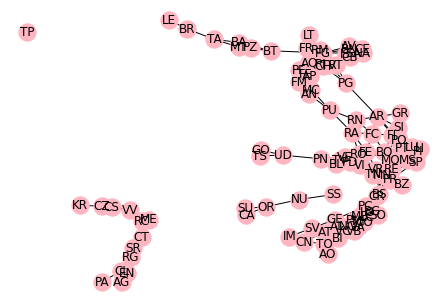

In [36]:
nx.draw(P, with_labels=True, node_color='lightpink')